In [ ]:
import warnings
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import solarsystem
import pandas as pd
import numpy as np
import xlsxwriter
import datetime
import math

dataSet1 = pd.read_excel('/content/Iran1900-2020.xlsx', "1900-2006")
dataSet1 = dataSet1.dropna()
Dates = np.array(pd.DataFrame(dataSet1, columns=['Year']))
months = np.array(pd.DataFrame(dataSet1, columns=['Month']))
days = np.array(pd.DataFrame(dataSet1, columns=['Day']))
Hours = np.array(pd.DataFrame(dataSet1, columns=['Hour']))
Minutes = np.array(pd.DataFrame(dataSet1, columns=['Minute']))
Lats = np.array(pd.DataFrame(dataSet1, columns=['Lat']))
Longs = np.array(pd.DataFrame(dataSet1, columns=['Long']))
Mags = np.array(pd.DataFrame(dataSet1, columns=['Mag']))
Excel_file = xlsxwriter.Workbook('/content/final22.xlsx')
Sheet1 = Excel_file.add_worksheet("1900-2006")
row = 1
Sheet1.write(0, 0, 'label')
Sheet1.write(0, 1, 'Lat')
Sheet1.write(0, 2, 'Long')
Sheet1.write(0, 3, 'Mag')
Sheet1.write(0, 4, 'Sun-round')
Sheet1.write(0, 5, 'Sun-theta')
Sheet1.write(0, 6, 'Mercury-round')
Sheet1.write(0, 7, 'Mercury-theta')
Sheet1.write(0, 8, 'Venus-round')
Sheet1.write(0, 9, 'Venus-theta')
Sheet1.write(0, 10, 'Mars-round')
Sheet1.write(0, 11, 'Mars-theta')
Sheet1.write(0, 12, 'Jupiter-round')
Sheet1.write(0, 13, 'Jupiter-theta')
Sheet1.write(0, 14, 'Saturn-round')
Sheet1.write(0, 15, 'Saturn-theta')
Sheet1.write(0, 16, 'Uranus-round')
Sheet1.write(0, 17, 'Uranus-theta')
Sheet1.write(0, 18, 'Neptune-round')
Sheet1.write(0, 19, 'Neptune-theta')
Sheet1.write(0, 20, 'Pluto-round')
Sheet1.write(0, 21, 'Pluto-theta')
Sheet1.write(0, 22, 'Ceres-round')
Sheet1.write(0, 23, 'Ceres-theta')
Sheet1.write(0, 24, 'Chiron-round')
Sheet1.write(0, 25, 'Chiron-theta')
Sheet1.write(0, 26, 'Eris-round')
Sheet1.write(0, 27, 'Eris-theta')
for i in range(Mags.size):
    year = Dates[i]
    month = months[i]
    day = days[i]
    t = len(Hours[i])
    hour = 12
    minute = 12
    if float(Mags[i]) >= 4.5:     
        label = 1
    else: 
        label = 0
    Sheet1.write(row, 0, label)
    Sheet1.write(row, 1, float(Lats[i]))
    Sheet1.write(row, 2, float(Longs[i]))
    Sheet1.write(row, 3, float(Mags[i]))
    print(year, month, day,hour,minute)

    output = solarsystem.Geocentric(int(year), int(month), int(day), int(hour), int(minute), plane='equatorial')
    planets = output.position()
    col = 4
    for planet in planets: 
        declination = math.degrees(round(planets[planet][1], 2))
        rightAscension = math.degrees(round(planets[planet][0], 2))
        theta = math.degrees(math.acos(math.cos(declination) * math.cos(rightAscension)))
        Sheet1.write(row, col, round(23533.603694294 * planets[planet][2], 3))
        col = col + 1
        Sheet1.write(row, col, round(theta, 2))
        col = col + 1
    col = 0
    row = row + 1

dataSet2 = pd.read_excel('/content/Iran1900-2020.xlsx', "2006-202010")
dataSet2 = dataSet2.dropna()
dataSet2 = dataSet2.dropna()
Lats = np.array(pd.DataFrame(dataSet2, columns=['Lat.']))
Longs = np.array(pd.DataFrame(dataSet2, columns=['Long.']))
Mags = np.array(pd.DataFrame(dataSet2, columns=['Mag.']))
dates = np.array(pd.DataFrame(dataSet2, columns=['Date']))

Sheet2 = Excel_file.add_worksheet("2006-202010")
row = 1
col = 0
Sheet2.write(0, 0, 'label')
Sheet2.write(0, 1, 'Lat')
Sheet2.write(0, 2, 'Long')
Sheet2.write(0, 3, 'Mag')
Sheet2.write(0, 4, 'Sun-round')
Sheet2.write(0, 5, 'Sun-theta')
Sheet2.write(0, 6, 'Mercury-round')
Sheet2.write(0, 7, 'Mercury-theta')
Sheet2.write(0, 8, 'Venus-round')
Sheet2.write(0, 9, 'Venus-theta')
Sheet2.write(0, 10, 'Mars-round')
Sheet2.write(0, 11, 'Mars-theta')
Sheet2.write(0, 12, 'Jupiter-round')
Sheet2.write(0, 13, 'Jupiter-theta')
Sheet2.write(0, 14, 'Saturn-round')
Sheet2.write(0, 15, 'Saturn-theta')
Sheet2.write(0, 16, 'Uranus-round')
Sheet2.write(0, 17, 'Uranus-theta')
Sheet2.write(0, 18, 'Neptune-round')
Sheet2.write(0, 19, 'Neptune-theta')
Sheet2.write(0, 20, 'Pluto-round')
Sheet2.write(0, 21, 'Pluto-theta')
Sheet2.write(0, 22, 'Ceres-round')
Sheet2.write(0, 23, 'Ceres-theta')
Sheet2.write(0, 24, 'Chiron-round')
Sheet2.write(0, 25, 'Chiron-theta')
Sheet2.write(0, 26, 'Eris-round')
Sheet2.write(0, 27, 'Eris-theta')
for i in range(Mags.size):
    year = str(dates[i]).split('/')[0]
    month = str(dates[i]).split('/')[1]
    day = str(dates[i]).split('/')[2]
    hour = 12 
    minute = 12
    if float(Mags[i]) >= 4.5:
        label = 1
    else:
        label = 0
    Sheet2.write(row, 0, label)
    Sheet2.write(row, 1, float(Lats[i]))
    Sheet2.write(row, 2, float(Longs[i]))
    Sheet2.write(row, 3, float(Mags[i]))
    print(year,month,day,hour, minute)
    output = solarsystem.Geocentric(int(year[2:]), int(month), int(day[:-2]), int(hour), int(minute), plane='equatorial')
    planets = output.position()
    col = 4
    for planet in planets:
        declination = math.degrees(round(planets[planet][1], 2))
        rightAscension = math.degrees(round(planets[planet][0], 2))
        theta = math.degrees(math.acos(math.cos(declination) * math.cos(rightAscension)))
        Sheet2.write(row, col, round(23533.603694294 * planets[planet][2], 2))
        col = col + 1
        Sheet2.write(row, col, round(theta, 2))
        col = col + 1
    col = 0
    row = row + 1

Excel_file.close()


Streaming output truncated to the last 5000 lines.
['2019 04 03'] 12 12
['2019 04 03'] 12 12
['2019 04 04'] 12 12
['2019 04 04'] 12 12
['2019 04 04'] 12 12
['2019 04 04'] 12 12
['2019 04 04'] 12 12
['2019 04 04'] 12 12
['2019 04 04'] 12 12
['2019 04 05'] 12 12
['2019 04 05'] 12 12
['2019 04 05'] 12 12
['2019 04 05'] 12 12
['2019 04 05'] 12 12
['2019 04 05'] 12 12
['2019 04 06'] 12 12
['2019 04 06'] 12 12
['2019 04 06'] 12 12
['2019 04 06'] 12 12
['2019 04 06'] 12 12
['2019 04 06'] 12 12
['2019 04 06'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 07'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 08'] 12 12
['2019 04 09'] 12 12
['20

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 5.8MB/s 


In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 8.7MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


sheet1 = pd.read_excel('/content/final22.xlsx', "1900-2006")
sheet2 = pd.read_excel('/content/final22.xlsx', "2006-202010")
features_sheet1 = sheet1[['Lat', 'Long', 'Sun-round', 'Sun-theta']]#, 'R-Mercury', 'T-Mercury', 'R-Venus', 'T-Venus','R-Mars','T-Mars',	'R-Jupiter'	,'T-Jupiter',	'R-Saturn',	'T-Saturn'	,'R-Uranus',	'T-Uranus',	'R-Neptune',	'T-Neptune'	,'R-Pluto',	'T-Pluto',	'R-Ceres'	,'T-Ceres'	,'R-Chiron'	,'T-Chiron'	,'R-Eris'	,'T-Eris'	]]
features_sheet2 = sheet2[[ 'Lat', 'Long' , 'Sun-round', 'Sun-theta']]#, 'R-Mercury', 'T-Mercury', 'R-Venus', 'T-Venus','R-Mars','T-Mars',	'R-Jupiter'	,'T-Jupiter',	'R-Saturn',	'T-Saturn'	,'R-Uranus',	'T-Uranus',	'R-Neptune',	'T-Neptune'	,'R-Pluto',	'T-Pluto',	'R-Ceres'	,'T-Ceres'	,'R-Chiron'	,'T-Chiron'	,'R-Eris'	,'T-Eris']]
features = np.concatenate((features_sheet2, features_sheet1))
labels = np.concatenate((sheet2['label'], sheet1['label']))

        Lat   Long  Sun-round  Sun-theta
0     40.72  48.71  23240.573      88.02
1     27.08  56.34  23926.200      93.55
2     39.50  48.00  23721.346     155.47
3     41.90  45.60  23540.219      92.71
4     41.90  45.60  23533.440     105.54
...     ...    ...        ...        ...
8618  30.93  56.72  23143.435     109.20
8619  29.93  57.79  23143.435     109.20
8620  28.12  56.07  23143.435     109.20
8621  38.72  44.44  23141.431     167.42
8622  27.48  55.93  23141.431     167.42

[8623 rows x 4 columns]
197
random forest         planet&sun r and t and  lat , long         100, balanced_subsample
[[9821   73]
 [ 774  124]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9894
           1       0.63      0.14      0.23       898

    accuracy                           0.92     10792
   macro avg       0.78      0.57      0.59     10792
weighted avg       0.90      0.92      0.90     10792



# New Section

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [ ]:
#--------------------- PCA ---------------------

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

imp.fit_transform(X_train)

X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

In [ ]:
#----------------------------------------------- Random Search ---------------------------------

In [ ]:
params = {
        'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
        'n_estimators': [10, 100, 150, 200, 300, 400, 500, 600],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 8]
        }

In [ ]:
xgb = XGBClassifier(objective='multi:softmax', silent=True, num_class=10)

In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 26.0min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f35a5295eb8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None, num_class=10,
                                           objective...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.001, 0.005, 0.01,
                  

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-50-AllDist_AllAngles.csv', index=False)


 All results:
{'mean_fit_time': array([385.78663611, 204.6290905 , 453.44357924,   5.8238122 ,
       150.35519805]), 'std_fit_time': array([ 3.74501422,  5.03239627, 12.35250879,  0.09874994, 36.01604973]), 'mean_score_time': array([5.04263248, 2.36381497, 4.46725388, 0.07012706, 1.31395092]), 'std_score_time': array([0.13628735, 0.05150668, 0.49588436, 0.00271521, 0.48704194]), 'param_subsample': masked_array(data=[0.6, 0.8, 0.8, 0.6, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[600, 300, 500, 10, 150],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 5, 1, 1, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 4, 5, 4, 8],
             mask=[False, False, False, False, False],
 

In [ ]:
preds = random_search.predict_proba(X_test)
results_df = pd.DataFrame(data={'action_class':y_test, 'prediction':preds[:,1]})
results_df.to_csv('submission-random-grid-search-xgb-porto-50-AllDist_AllAngles.csv', index=False)

In [ ]:
# yprob = bst.predict( X_test ).reshape( y_test.shape[0], 100 )
# ylabel = np.argmax(yprob, axis=1)

# print ('predicting, classification error=%f' % \
#        (np.sum( ylabel != ytest) / float(ytest.shape[0]) ))

In [ ]:
y_test.shape

(10158,)

In [ ]:
#---------------- train model -------------------

In [ ]:
train_model = XGBClassifier(subsample=1.0, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.005, gamma=1, colsample_bytree=1.0, objective='multi:softmax', silent=True, num_class=10)


In [ ]:
train_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1,
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, num_class=10, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1.0, verbosity=1)

In [ ]:
import joblib
joblib.dump(train_model, "/content/model.sav")

['/content/model.sav']

In [ ]:
# pred1 = train_model1.predict(X_test)
preds = train_model.predict(X_test)

# print('Model 1 XGboost Report %r' % (classification_report(y_test, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test, preds)))

Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96      9893\n           1       0.64      0.08      0.15       899\n\n    accuracy                           0.92     10792\n   macro avg       0.78      0.54      0.55     10792\nweighted avg       0.90      0.92      0.89     10792\n'


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced_subsample')
model.fit(features_train, classFeature_train)

classFeature_pred = model.predict(features_test)
print(list(classFeature_pred).count(1))
print(list(classFeature_pred).count(0))
print(confusion_matrix(classFeature_test, classFeature_pred))
print(classification_report(classFeature_test, classFeature_pred))

[[9851   42]
 [ 823   76]]


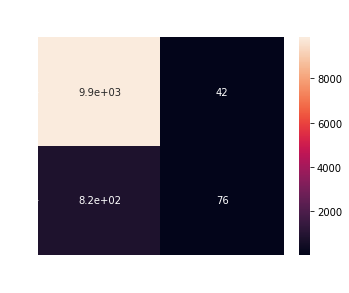

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

#clf = SVC(kernel = 'linear').fit(x_train,y_train)
#clf.predict(x_train)
#y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, preds) 

# Transform to df for easier plotting

cm_df = pd.DataFrame(cm, index = ["zero", "one"],
                                 columns = ["zero", "one"])

print(cm)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('XGBoost - Joints Dist and Angles with PCA \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds))).set_color('white')
plt.ylabel('True label').set_color('white')
plt.xlabel('Predicted label').set_color('white')
#plt.xaxis.label.set_color('White')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

In [ ]:
!nvidia-smi

Wed Feb 10 12:11:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    32W / 250W |    337MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
dataSet1 = pd.read_excel('/content/Iran1900-2020.xlsx', "1900-2006")
dataSet1 = dataSet1.dropna()
Dates = np.array(pd.DataFrame(dataSet1, columns=['Year']))
months = np.array(pd.DataFrame(dataSet1, columns=['Month']))
days = np.array(pd.DataFrame(dataSet1, columns=['Day']))
Hours = np.array(pd.DataFrame(dataSet1, columns=['Hour']))
Minutes = np.array(pd.DataFrame(dataSet1, columns=['Minute']))
Lats = np.array(pd.DataFrame(dataSet1, columns=['Lat']))
Longs = np.array(pd.DataFrame(dataSet1, columns=['Long']))
Mags = np.array(pd.DataFrame(dataSet1, columns=['Mag']))
Excel_file = xlsxwriter.Workbook('/content/final22.xlsx')
Sheet1 = Excel_file.add_worksheet("1900-2006")
row = 1
Sheet1.write(0, 0, 'label')
Sheet1.write(0, 1, 'Lat')
Sheet1.write(0, 2, 'Long')
Sheet1.write(0, 3, 'Mag')
Sheet1.write(0, 4, 'Sun-round')
Sheet1.write(0, 5, 'Sun-theta')
Sheet1.write(0, 6, 'Mercury-round')
Sheet1.write(0, 7, 'Mercury-theta')
Sheet1.write(0, 8, 'Venus-round')
Sheet1.write(0, 9, 'Venus-theta')
Sheet1.write(0, 10, 'Mars-round')
Sheet1.write(0, 11, 'Mars-theta')
Sheet1.write(0, 12, 'Jupiter-round')
Sheet1.write(0, 13, 'Jupiter-theta')
Sheet1.write(0, 14, 'Saturn-round')
Sheet1.write(0, 15, 'Saturn-theta')
Sheet1.write(0, 16, 'Uranus-round')
Sheet1.write(0, 17, 'Uranus-theta')
Sheet1.write(0, 18, 'Neptune-round')
Sheet1.write(0, 19, 'Neptune-theta')
Sheet1.write(0, 20, 'Pluto-round')
Sheet1.write(0, 21, 'Pluto-theta')
Sheet1.write(0, 22, 'Ceres-round')
Sheet1.write(0, 23, 'Ceres-theta')
Sheet1.write(0, 24, 'Chiron-round')
Sheet1.write(0, 25, 'Chiron-theta')
Sheet1.write(0, 26, 'Eris-round')
Sheet1.write(0, 27, 'Eris-theta')
for i in range(Mags.size):
    year = Dates[i]
    month = months[i]
    day = days[i]
    t = len(Hours[i])
    hour = 12
    minute = 12
    if float(Mags[i]) >= 4.5:     
        label = 1
    else: 
        label = 0
    Sheet1.write(row, 0, label)
    Sheet1.write(row, 1, float(Lats[i]))
    Sheet1.write(row, 2, float(Longs[i]))
    Sheet1.write(row, 3, float(Mags[i]))
    print(year, month, day,hour,minute)

    output = solarsystem.Geocentric(int(year), int(month), int(day), int(hour), int(minute), plane='equatorial')
    planets = output.position()
    col = 4
    for planet in planets: 
        declination = math.degrees(round(planets[planet][1], 2))
        rightAscension = math.degrees(round(planets[planet][0], 2))
        theta = math.degrees(math.acos(math.cos(declination) * math.cos(rightAscension)))
        Sheet1.write(row, col, round(23533.603694294 * planets[planet][2], 3))
        col = col + 1
        Sheet1.write(row, col, round(theta, 2))
        col = col + 1
    col = 0
    row = row + 1



In [ ]:
model = joblib.load('/content/model.sav')

In [ ]:
name = '1900-2006'
sheet1 = pd.read_excel('/content/final22.xlsx', name)
features = sheet1[['Lat', 'Long', 'Sun-round', 'Sun-theta']]#, 'R-Mercury', 'T-Mercury', 'R-Venus', 'T-Venus','R-Mars','T-Mars',	'R-Jupiter'	,'T-Jupiter',	'R-Saturn',	'T-Saturn'	,'R-Uranus',	'T-Uranus',	'R-Neptune',	'T-Neptune'	,'R-Pluto',	'T-Pluto',	'R-Ceres'	,'T-Ceres'	,'R-Chiron'	,'T-Chiron'	,'R-Eris'	,'T-Eris'	]]
print(features)
classFeature = sheet1['label']
preds = model.predict(features)

        Lat   Long  Sun-round  Sun-theta
0     40.72  48.71  23240.573      88.02
1     27.08  56.34  23926.200      93.55
2     39.50  48.00  23721.346     155.47
3     41.90  45.60  23540.219      92.71
4     41.90  45.60  23533.440     105.54
...     ...    ...        ...        ...
8618  30.93  56.72  23143.435     109.20
8619  29.93  57.79  23143.435     109.20
8620  28.12  56.07  23143.435     109.20
8621  38.72  44.44  23141.431     167.42
8622  27.48  55.93  23141.431     167.42

[8623 rows x 4 columns]


In [ ]:
preds = list(preds)
count = 0
c = 0
for i in range(len(preds)):
  if preds[i]==1:
    count = count + 1
  else:
    c = c+1

print(count,c)

2991 5632
